<a href="https://colab.research.google.com/github/Farheena-NRIDegree/mini-project-on-python/blob/main/co2_emission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np

In [ ]:
# Mount Google Drive to access files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define file path

path = "/content/drive/MyDrive/CO2 "

In [ ]:
# Load the data from the file into a pandas DataFrame

df = pd.read_csv(path)

In [ ]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Display first 10 rows

df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# Display the last 10 rows

df.tail(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1057,2014,VOLVO,S60 AWD,COMPACT,2.5,5,AS6,X,11.6,8.3,10.1,28,232
1058,2014,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
# Get DataFrame Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
# Calculate Summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [ ]:
# Get DataFrame dimensions

df.shape

(1067, 13)

In [ ]:
# Count Missing Values

print(df.isnull().sum())

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [ ]:
# Filtering DataFrame

Filtered_data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
Filtered_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


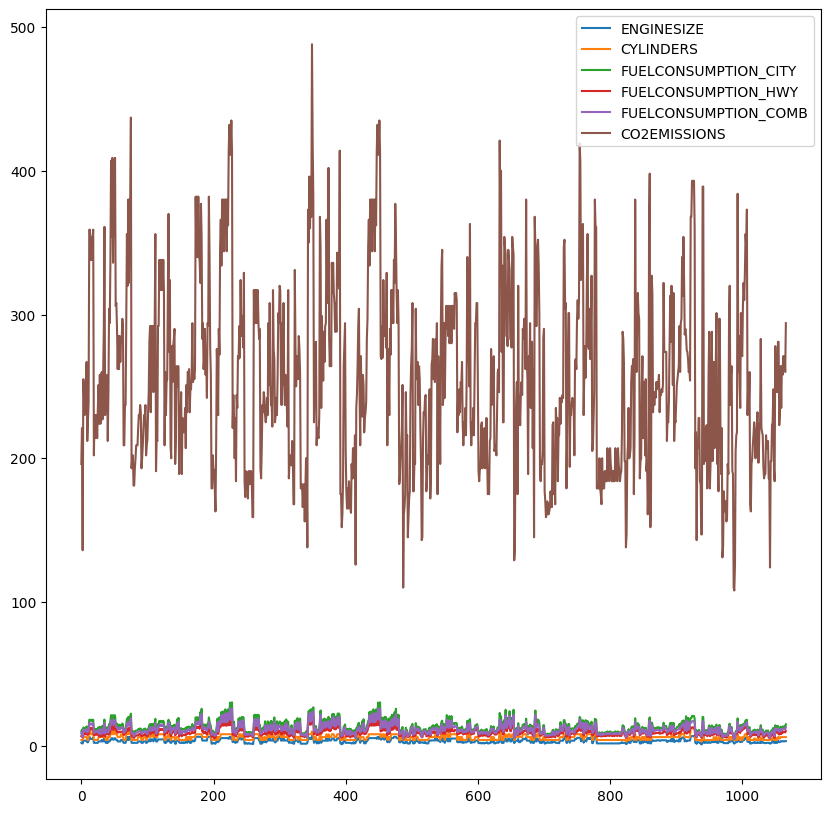

In [ ]:
# Visualize the data using a plot

plots = Filtered_data.plot(figsize=(10,10))

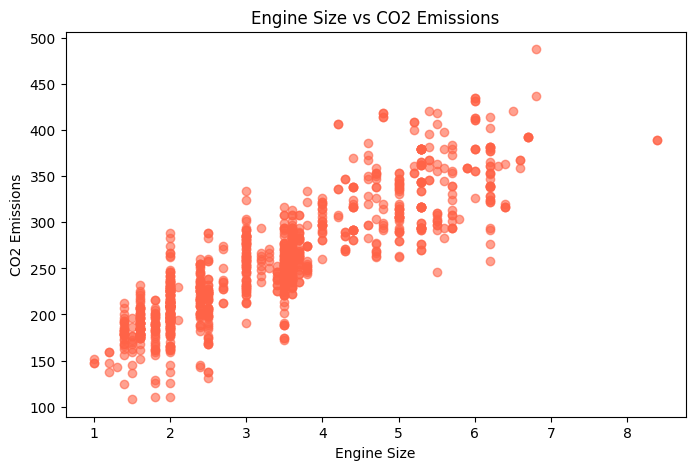

In [ ]:
# Scatter plot of Engine Size vs CO2 Emissions
plt.figure(figsize=(8, 5))
plt.scatter(data=df, x='ENGINESIZE', y='CO2EMISSIONS',color=['tomato'],alpha=0.6)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs CO2 Emissions')
plt.grid(False)
plt.show()

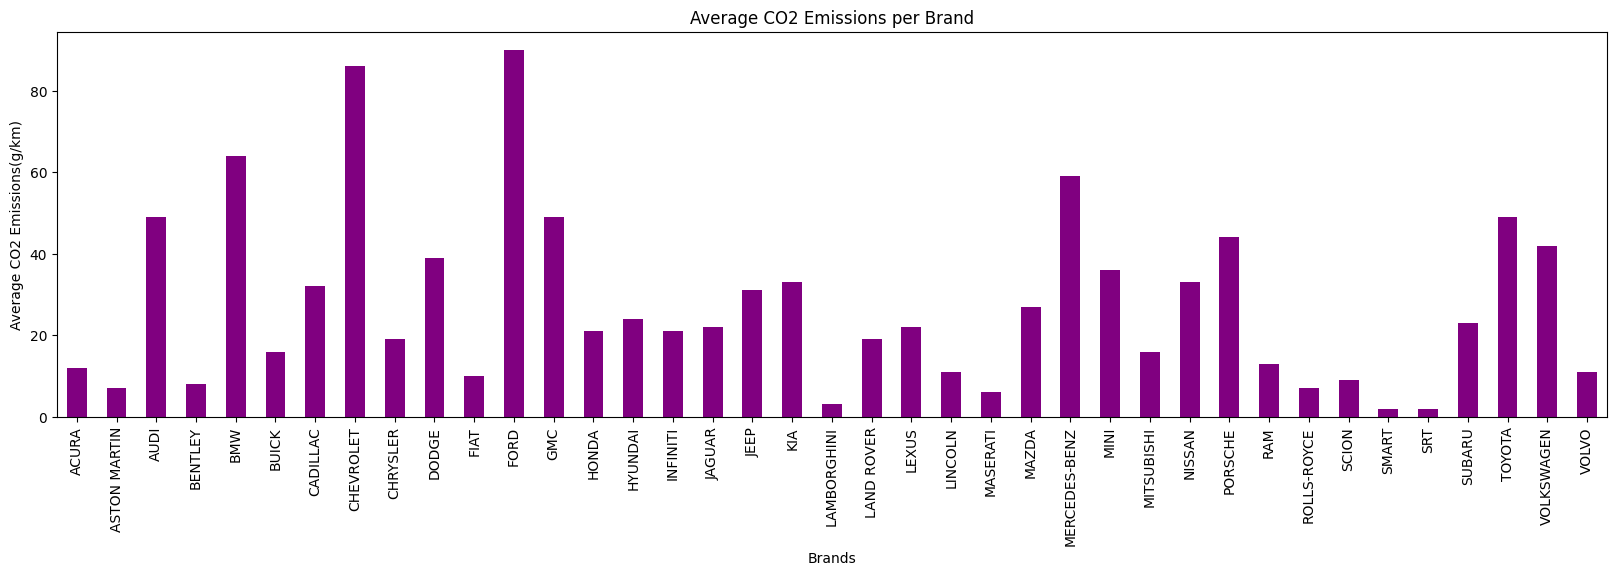

In [ ]:
# Count occurrences of each brand,sort by index (brand names), and plot as a bar chart
plt.figure(figsize=(20,5))
df['MAKE'].value_counts().sort_index().plot(kind ='bar',color='purple')
plt.title("Average CO2 Emissions per Brand")
plt.xlabel("Brands")
plt.ylabel("Average CO2 Emissions(g/km)")
plt.show()

<Figure size 1000x600 with 0 Axes>

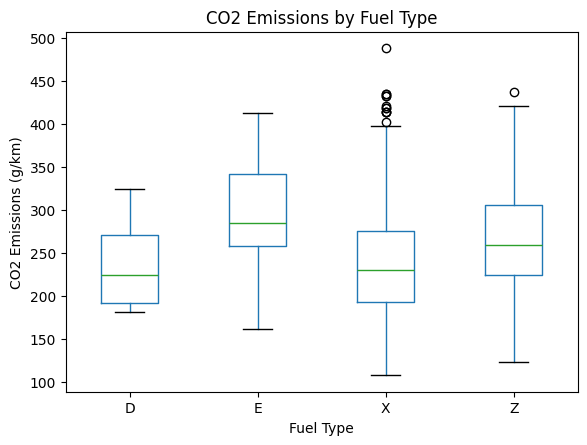

In [ ]:
# Create a box plot of CO2 Emissions grouped by fuel type
plt.figure(figsize=(10, 6))
df.boxplot(column='CO2EMISSIONS', by='FUELTYPE')
plt.title("CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.suptitle("")
plt.grid()
plt.show()

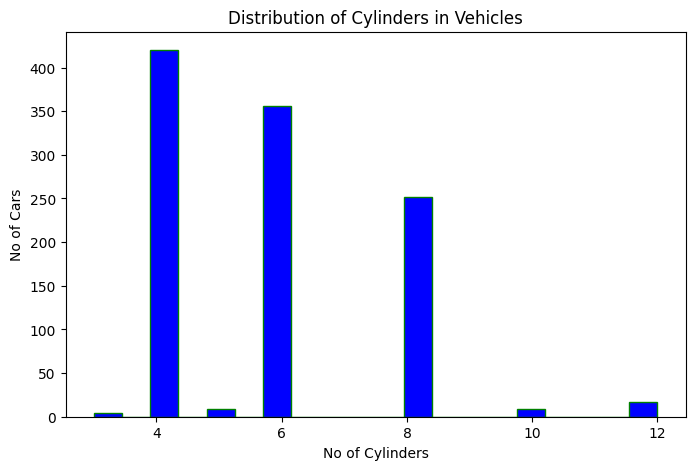

In [ ]:
# Create a histogram of the 'CYLINDERS' column with 20 bins
plt.figure(figsize=(8,5))
plt.hist(df['CYLINDERS'],bins=20,color='blue',edgecolor='green')
plt.title("Distribution of Cylinders in Vehicles")
plt.xlabel("No of Cylinders")
plt.ylabel("No of Cars")
plt.grid(False)
plt.show()

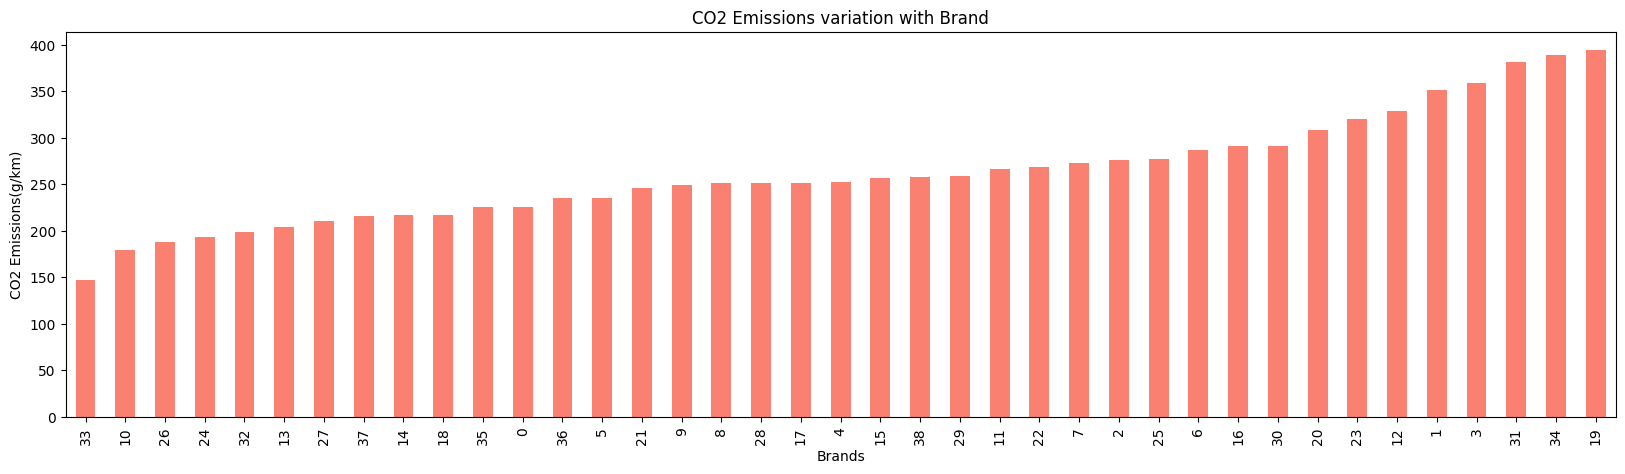

In [ ]:
# Attempt to create a bar plot of CO2 Emissions for each car brand
df_grouped = df.groupby('MAKE')['CO2EMISSIONS'].mean().sort_values()
df_grouped.plot(kind='bar', figsize=(20, 5), color='Salmon')
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.title("CO2 Emissions variation with Brand")
plt.show()

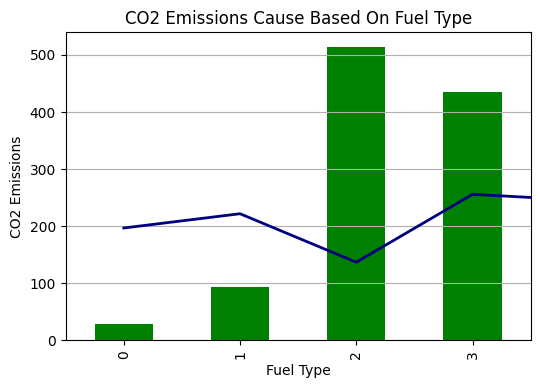

In [ ]:
# Create BarChart for fuel type counts and line plot for CO2 Emission

plt.figure(figsize=(6,4))
df['FUELTYPE'].value_counts().sort_index().plot(kind='bar',color='g')
plt.plot(df['CO2EMISSIONS'],color='navy',linewidth=2)
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Cause Based On Fuel Type')
plt.grid(True, axis='y')
plt.show()

In [ ]:
# Import necessary libraries for data prepocessing and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Convert categorical columns to numerical values using LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
        df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
# Define Columns
Types=["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]
gas= "CO2EMISSIONS"

In [ ]:
X = df[Types]
Y = df[gas]

In [ ]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% for training
# random_state=42 ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Create an instance of the Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Import metrics to evaluate the model's performance
# Use the trained model to make predictions on the test data
# Calculate the Mean Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error : {RMSE}')


Mean Absolute Error : 16.721593983516485
Mean Squared Error : 512.8551370148301
Root Mean Squared Error : 22.64630515149944


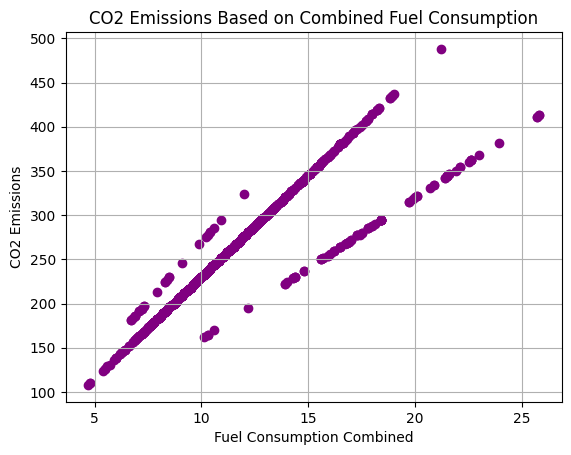

In [ ]:
# Create a scatter plot to visualize the relationship between Fuel Consumption Combined and CO2 Emissions

plt.scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'],color='purple')
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.title('CO2 Emissions Based on Combined Fuel Consumption')
plt.show()

In [ ]:
# Sort the feature matrix X in ascending order along the 0th axis (rows)
XSoreted= np.sort(X,axis=0)

# Use the trained model to make predictions on the sorted feature matrix
y_pred = model.predict(XSoreted)

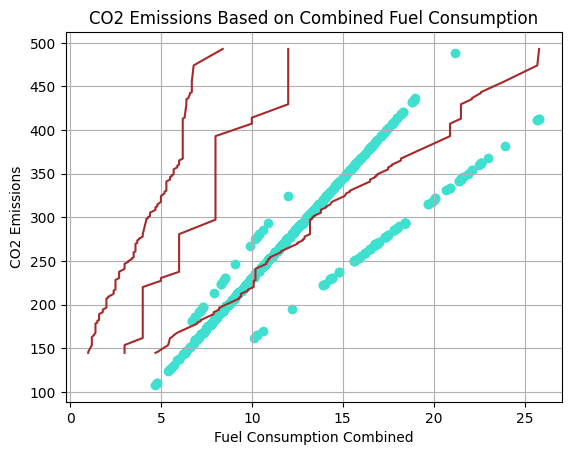

In [ ]:
# Create a scatter plot to visualize the relationship between Fuel Consumption Combined and CO2 Emissions
# Plot the predicted CO2 Emissions based on the sorted feature matrix

plt.scatter(df['FUELCONSUMPTION_COMB'],df['CO2EMISSIONS'],color='turquoise')
plt.plot(XSoreted,y_pred,color='brown')
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.title('CO2 Emissions Based on Combined Fuel Consumption')
plt.show()

In [ ]:
# Add a new column to the original DataFrame with the predicted CO2 values

feature_columns = ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]
X = df[feature_columns]
predicted_co2 = model.predict(X)
df["Predicted_CO2"] = predicted_co2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the DataFrame with predictions to a CSV file

output_file = "/content/drive/My Drive/co2_predictions.csv"
df.to_csv(output_file, index=False)
print(f"Predictions saved to: {output_file}")

Predictions saved to: /content/drive/My Drive/co2_predictions.csv


In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Predicted_CO2
0,2014,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196,199.316620
1,2014,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221,214.273288
2,2014,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136,168.957789
3,2014,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255,255.196117
4,2014,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244,250.435711


In [ ]:
# Create a new DataFrame (df1) with a subset of columns from the original DataFrame (df)

df1 = df[["ENGINESIZE","CYLINDERS","FUELTYPE","FUELCONSUMPTION_COMB","CO2EMISSIONS","Predicted_CO2"]]

In [ ]:
df1.head(10)

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS,Predicted_CO2
0,2.0,4,3,8.5,196,199.316620
1,2.4,4,3,9.6,221,214.273288
2,1.5,4,3,5.9,136,168.957789
3,3.5,6,3,11.1,255,255.196117
4,3.5,6,3,10.6,244,250.435711
5,3.5,6,3,10.0,230,244.723224
6,3.5,6,3,10.1,232,245.675305
7,3.7,6,3,11.1,255,257.438005
8,3.7,6,3,11.6,267,262.198411
9,2.4,4,3,9.2,212,210.464964


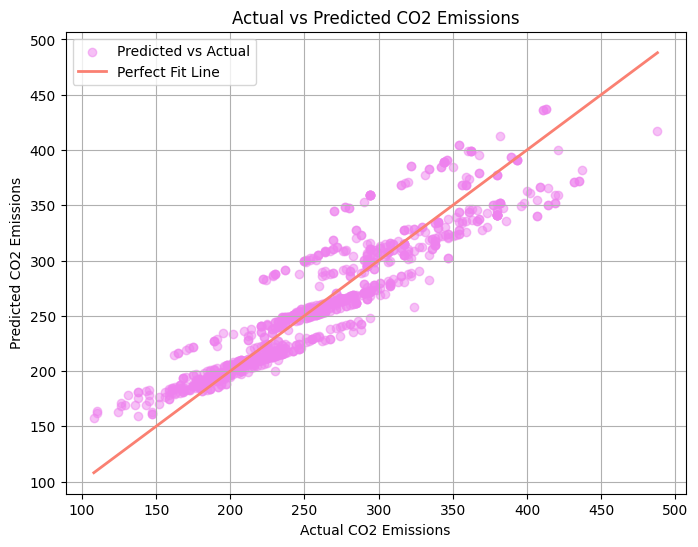

In [ ]:
#Predicted CO2 Emissions
# Scatter plot to visualize the relationship between actual and predicted CO2 emissions

plt.figure(figsize=(8, 6))
plt.scatter(df["CO2EMISSIONS"], df["Predicted_CO2"], color='violet', alpha=0.5, label="Predicted vs Actual")
plt.plot([df["CO2EMISSIONS"].min(),df["CO2EMISSIONS"].max()],[df["CO2EMISSIONS"].min(),df["CO2EMISSIONS"].max()],
         color='salmon', linewidth=2,label="Perfect Fit Line")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()

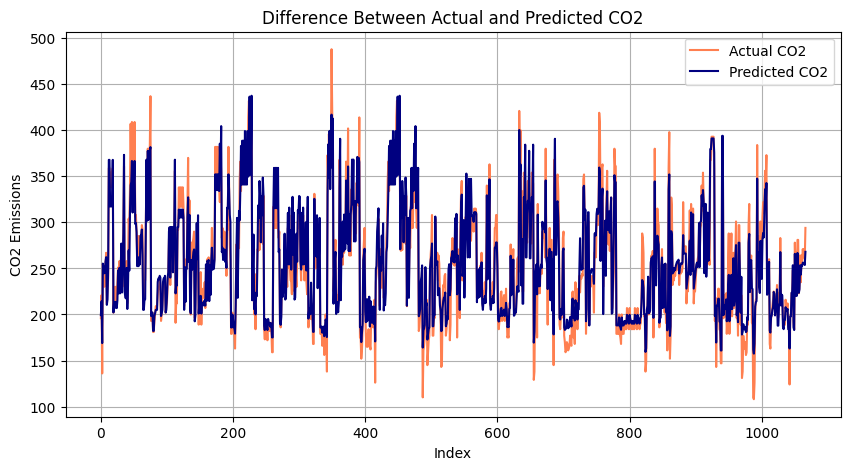

In [ ]:
# Difference Between Actual and Predicted CO2
plt.figure(figsize=(10, 5))
plt.plot(df["CO2EMISSIONS"],label="Actual CO2",color='coral')
plt.plot(df["Predicted_CO2"], label="Predicted CO2", color='navy')

plt.xlabel("Index")
plt.ylabel("CO2 Emissions")
plt.title("Difference Between Actual and Predicted CO2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# User Input Quentions

# Collect data from 3 users
user_data = []
for i in range(3):
    print(f"\nEnter details for User {i+1}:")
    enginesize = float(input("Enter Engine Size (L): "))
    cylinders = int(input("Enter Number of Cylinders: "))
    fuelcomb = float(input("Enter Combined Fuel Consumption (L/100 km): "))

    # Store user input
    user_data.append([enginesize, cylinders, fuelcomb])
# Create DataFrame
input_data = pd.DataFrame(user_data, columns=Types)  # Ensure 'Types' matches your model's expected feature names

# Predict CO2 emissions
predicted_co2 = model.predict(input_data)

# Display results
for i, co2 in enumerate(predicted_co2):
   print(f"\nEstimated CO2 Emissions for User {i+1}: {co2:.2f} g/km")





Enter details for User 1:
Enter Engine Size (L): 3.5
Enter Number of Cylinders: 6
Enter Combined Fuel Consumption (L/100 km): 11.1

Enter details for User 2:
Enter Engine Size (L): 3.7
Enter Number of Cylinders: 6
Enter Combined Fuel Consumption (L/100 km): 11.1

Enter details for User 3:
Enter Engine Size (L): 2.4
Enter Number of Cylinders: 4
Enter Combined Fuel Consumption (L/100 km): 9.2

Estimated CO2 Emissions for User 1: 255.20 g/km

Estimated CO2 Emissions for User 2: 257.44 g/km

Estimated CO2 Emissions for User 3: 210.46 g/km


In [ ]:
# Create DataFrame
columns = ["Engine Size (L)", "Number of Cylinders", "Fuel Consumption (L/100 km)"]
dataset = pd.DataFrame(user_data, columns=columns)

# Save dataset to CSV file
csv_filename = "user_vehicle_data.csv"
dataset.to_csv(csv_filename, index=False)

print(f"\nDataset saved as {csv_filename}")


Dataset saved as user_vehicle_data.csv


In [ ]:
data = pd.read_csv('/content/user_vehicle_data.csv')

In [ ]:
data

,Engine Size (L),Number of Cylinders,Fuel Consumption (L/100 km)
0,3.5,6,11.1
1,3.7,6,11.1
2,2.4,4,9.2


In [ ]:
# Add new Columns to dataframe
CO2EMISSION = [255.00, 354.00, 359.00]
predicted_co2 = [255.20, 323.90, 367.88]
data["Actual CO2 Emissions (g/km)"] = CO2EMISSION
data["Predicted CO2 Emissions (g/km)"] = predicted_co2

data

,Engine Size (L),Number of Cylinders,Fuel Consumption (L/100 km),Actual CO2 Emissions (g/km),Predicted CO2 Emissions (g/km)
0,3.5,6,11.1,255.0,255.20
1,3.7,6,11.1,354.0,323.90
2,2.4,4,9.2,359.0,367.88


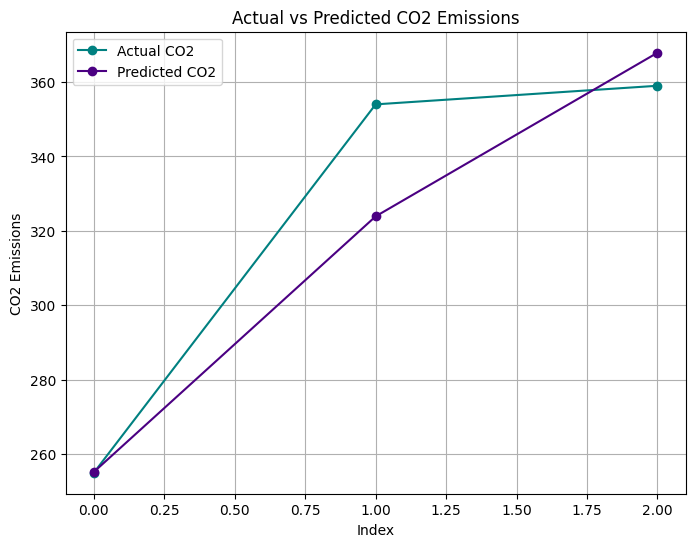

In [ ]:
# User Data Output Presending Difference btw Actual and Predicted CO2
plt.figure(figsize=(8, 6))
plt.plot(data["Actual CO2 Emissions (g/km)"],  color='teal', label="Actual CO2",marker='o')
plt.plot(data["Predicted CO2 Emissions (g/km)"], color='indigo', label="Predicted CO2",marker='o')
plt.xlabel("Index")
plt.ylabel("CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.grid()
plt.show()